In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use({'figure.facecolor':'white'})

In [2]:
weather_data = pd.read_csv('weather_preprocessed.csv')
weather_data.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Month_sin,Month_cos,Day_sin,Day_cos,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,13.4,22.9,2.018669,8.200310,44.0,20.0,24.0,71.0,22.0,1007.7,...,-2.449294e-16,1.0,0.201299,0.979530,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,7.4,25.1,2.071791,11.631590,44.0,4.0,22.0,44.0,25.0,1010.6,...,-2.449294e-16,1.0,0.394356,0.918958,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,12.9,25.7,2.349124,12.029969,46.0,19.0,26.0,38.0,30.0,1007.6,...,-2.449294e-16,1.0,0.571268,0.820763,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,9.2,28.0,2.125747,12.024438,24.0,11.0,9.0,45.0,16.0,1017.6,...,-2.449294e-16,1.0,0.724793,0.688967,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,17.5,32.3,2.018460,6.914916,41.0,7.0,20.0,82.0,33.0,1010.8,...,-2.449294e-16,1.0,0.848644,0.528964,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01


In [3]:
weather_data.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Adelaide', 'Albany',
       'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo',
       'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor',
       'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne',
       'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini',
       'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa',
       'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland',
       'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport',
       'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole',
       'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera',
       'Month_sin', 'Month_cos', 'Day_sin', 'Day

Посмотрим на корреляцию количественных признаков

<AxesSubplot:>

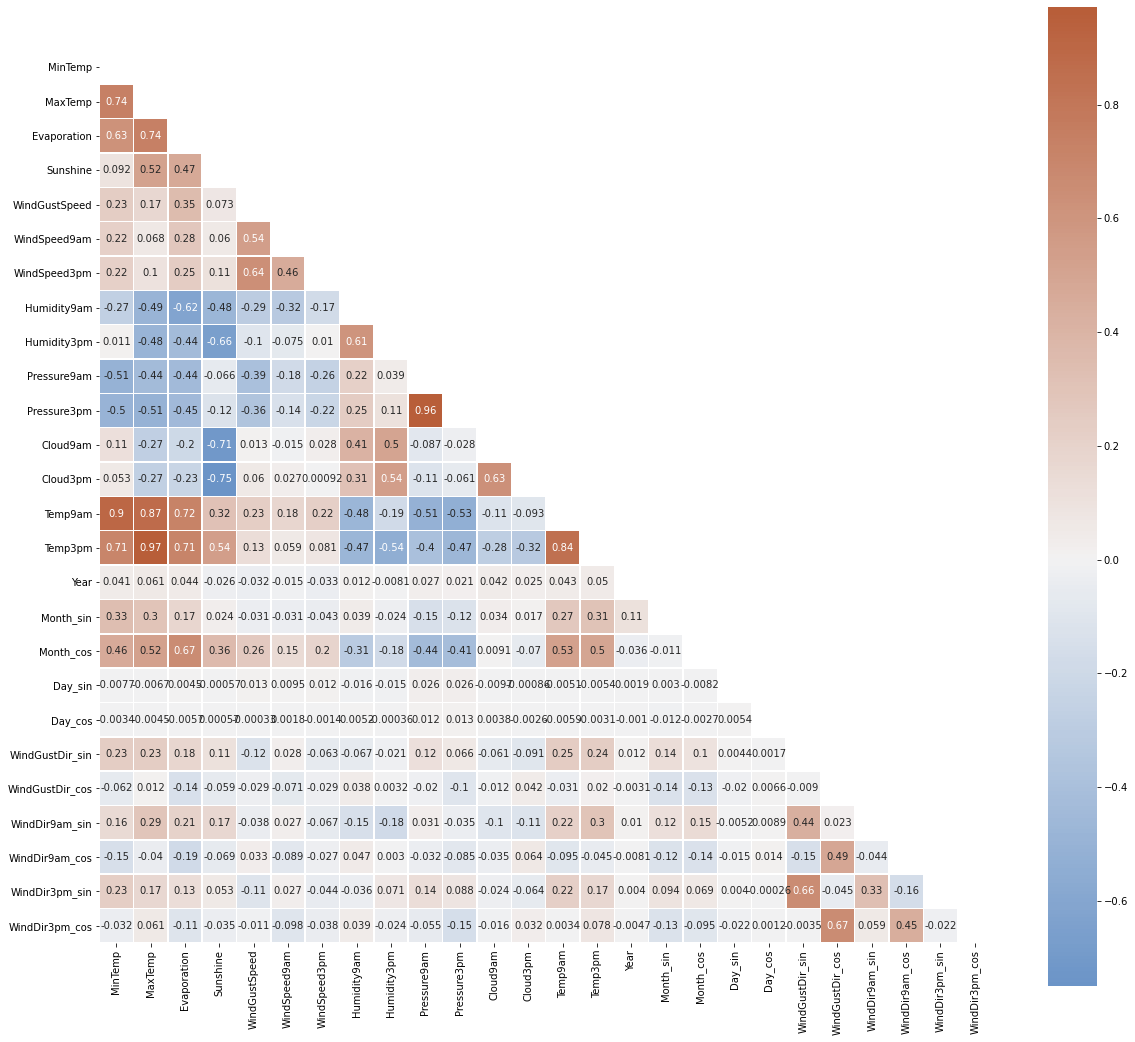

In [4]:
num_feat = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
           'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
           'Cloud9am', 'Cloud3pm', 'Temp9am',
           'Temp3pm', 'Year','Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'WindGustDir_sin',
           'WindGustDir_cos', 'WindDir9am_sin', 'WindDir9am_cos', 'WindDir3pm_sin',
           'WindDir3pm_cos']
corr = weather_data[num_feat].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})


Можно пронаблюдать сильную корреляцию между некоторыми признаками, например:
- *Temp3pm*/*MaxTemp*
- *Pressure3pm/Pressure9am*
- *Temp9am*/*MinTemp*
и т.д.

С одной стороны, проблема мультиколлинеарности может сказаться на качестве работы
линейных моделей, с другой мы наблюдаем коэффициенты корреляции меньше единицы, что означает,
что, выкинув один из коррелирующих признаков, потеряется какая то часть информации.
Можно поробовать применить метод главных компонент к сильно коррелирующим признакам.
Но часть информации все равно потеряется.

Количественные признаки, будем нормализовывать через стандартизацию. Год и облачность через MinMax нормализацию.
Перед этим разобъем выборку на тренировочную и тестовую,
чтобы к тестовой использовать параметры среднего и стандартного отклонения из тренировочной.

В итоге, будут проверяться три набора данных: с оригинальными признаками и их значениями, с нормализованными и
стандартизированными признаками, набор нормализованных данных с уменьшенной методом главных компонент размерностью

In [4]:
num_feats = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
             'Temp3pm', 'Evaporation', 'Sunshine']
cat_feats = ['Year','Cloud9am', 'Cloud3pm']

In [5]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = weather_data.drop(columns=['RainTomorrow'])
y = weather_data.RainTomorrow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

stand_scaler = StandardScaler().fit(X_train[num_feats])
minmax_scaler = MinMaxScaler().fit(X_train[cat_feats])

pca = PCA(n_components=1)
X_norm_train = X_train.copy()
X_norm_test = X_test.copy()

for x in [X_norm_train, X_norm_test]:
    x.loc[:, num_feats] = stand_scaler.transform(x.loc[:, num_feats])
    x.loc[:, cat_feats] = minmax_scaler.transform(x.loc[:, cat_feats])

X_pca_train = X_norm_train.copy()
X_pca_test = X_norm_test.copy()
for x in [X_pca_train, X_pca_test]:
    x.loc[:, 'MinTemp'] = pca.fit_transform(x[['Temp9am', 'MinTemp']])
    x.loc[:, 'MaxTemp'] = pca.fit_transform(x[['Temp3pm', 'MaxTemp']])
    x.loc[:,'Pressure'] = pca.fit_transform(x[['Pressure3pm', 'Pressure9am']])
    x.drop(columns=['Temp9am', 'Temp3pm', 'Pressure3pm', 'Pressure9am'], inplace=True)

In [6]:
X_train.describe()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Month_sin,Month_cos,Day_sin,Day_cos,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
count,80469.000000,80469.000000,80469.000000,80469.000000,80469.00000,80469.000000,80469.000000,80469.000000,80469.000000,80469.000000,...,8.046900e+04,8.046900e+04,8.046900e+04,80469.000000,8.046900e+04,8.046900e+04,8.046900e+04,8.046900e+04,8.046900e+04,8.046900e+04
mean,11.946459,23.624297,1.682501,7.869716,37.82474,13.062057,17.788289,67.380589,49.158801,1018.512545,...,2.158877e-02,-1.512035e-02,2.025648e-03,-0.019274,2.039109e-02,-4.145440e-02,6.321509e-02,3.967069e-02,1.819498e-02,-3.466442e-02
std,6.387316,6.804560,0.528916,3.309228,11.01852,7.938880,7.812117,17.784550,19.200005,6.300258,...,7.059613e-01,7.077686e-01,7.126505e-01,0.701260,7.099680e-01,7.027258e-01,6.877685e-01,7.220920e-01,7.098110e-01,7.033122e-01
min,-6.200000,2.500000,0.095310,0.000000,7.00000,0.000000,0.000000,18.000000,1.000000,998.700000,...,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,7.300000,18.500000,1.298347,5.700000,30.00000,7.000000,13.000000,56.000000,35.000000,1014.200000,...,-5.000000e-01,-8.660254e-01,-7.247928e-01,-0.758758,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01
50%,11.800000,23.100000,1.722767,8.300000,37.00000,13.000000,17.000000,68.000000,49.000000,1018.400000,...,1.224647e-16,-1.836970e-16,-2.449294e-16,-0.050649,1.224647e-16,-1.836970e-16,1.224647e-16,6.123234e-17,1.224647e-16,-1.836970e-16
75%,16.600000,28.500000,2.079442,10.400000,44.00000,19.000000,22.000000,80.000000,62.000000,1022.600000,...,8.660254e-01,5.000000e-01,7.247928e-01,0.688967,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01
max,30.200000,43.500000,3.394508,14.500000,72.00000,37.000000,39.000000,100.000000,100.000000,1036.600000,...,1.000000e+00,1.000000e+00,9.987165e-01,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Из-за дисбаланса классов будем использовать StratifiedKFold, который разбивает набор данных на
тренировочную и валидационную выборку с сохранением баланса классов.

In [7]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


Параметры моделей будем можно подбирать по сетке, для тяжелых моделей - по рандомизированной сетке, где
перебор параметров осуществляется случайным оброзом. Но в данном случае из-за размеров набора данных и кол-ва признаков
перебор, даже рандомизированный, осуществляется достаточно долго, поэтому были рассмотрены модели с заранее заданными
гиперпараметрами.

P.S. Все модели адски долго обучались на этом датасете, особенно SVM на ядре RBF, поэтому всё сделал
в упрощенном виде и без нелинейных ядер в SVM.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

Функция, в которой производится кросс-валидация моделей по метрикам точности, f1-метрике и площади
roc кривой. Далее для каждой модели строится roc кривая.

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score,  plot_confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import cross_validate

def evalute_model(model, name, X_test, y_test):
    print(f'\t---------------------------{name}---------------------------')
    scores = ['accuracy', 'f1', 'roc_auc']
    t0=time.time()

    val_scores = cross_validate(model, X_test, y_test, cv=skf, n_jobs=-1, scoring=scores)
    time_taken = time.time()-t0
    accuracy = val_scores['test_accuracy'].mean()
    f1 = val_scores['test_f1'].mean()
    roc_auc = val_scores['test_roc_auc'].mean()
    print("Accuracy = {}".format(accuracy))
    print("F1 score = {}".format(f1))
    print("Cross-val time taken = {}".format(time_taken))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)

    plt.plot(fper, tper, label='%s ROC (area = %0.2f)' % (name, roc_auc))

    return

Тут в тупую перебираются наборы данных: обычный набор данных, нормализованный и стандартизированный,
нормализованны и стандартизированный, в котором наиболее коррелирующие признаки были сжаты методом
главных компонент.

	=================================Original=================================
	---------------------------KNeighbors---------------------------
Accuracy = 0.8645904428215644
F1 score = 0.4916096347505148
Cross-val time taken = 33.58421850204468
	---------------------------NaiveBayes---------------------------
Accuracy = 0.6576489717208683
F1 score = 0.40471744658606373
Cross-val time taken = 0.6829864978790283
	---------------------------DecisionTree---------------------------
Accuracy = 0.7515662156068293
F1 score = 0.5093869808666457
Cross-val time taken = 0.6657726764678955
	---------------------------RandomForest---------------------------
Accuracy = 0.7545232204151439
F1 score = 0.5167872574246188
Cross-val time taken = 4.027038335800171
	---------------------------Linear SVM---------------------------
Accuracy = 0.8703897085193377
F1 score = 0.5185345172279928
Cross-val time taken = 39.72049260139465
	---------------------------Logistic Regression---------------------------
Accurac

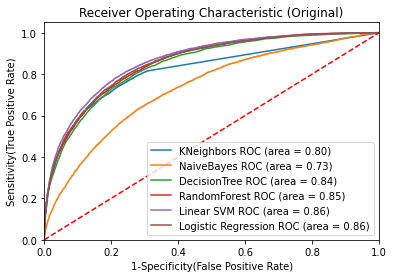

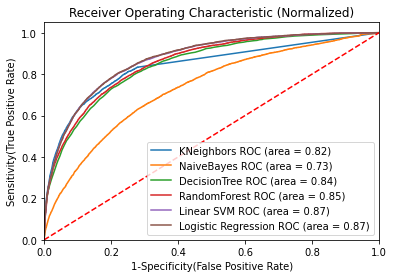

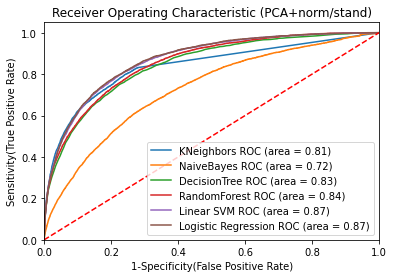

In [16]:
import itertools

train_data_list = [X_train, X_norm_train, X_pca_train]
test_data_list = [X_test, X_norm_test, X_pca_test]
prep_list = ['Original', 'Normalized', 'PCA+norm/stand']
names = ['KNeighbors','NaiveBayes', 'DecisionTree', 'RandomForest', 'Linear SVM', 'Logistic Regression']


for train_data, test_data, prep_name in itertools.zip_longest(train_data_list, test_data_list, prep_list):
    print(f'\t================================={prep_name}=================================')
    classifiers = []
    knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance', n_jobs=-1)
    knn_clf.fit(train_data, y_train)
    classifiers.append(knn_clf)

    gnb_clf = GaussianNB().fit(train_data, y_train)
    classifiers.append(gnb_clf)

    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=200,
                             min_samples_split=1000, random_state=42, class_weight='balanced')
    tree_clf.fit(train_data, y_train)
    classifiers.append(tree_clf)

    rf_clf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=200,
                            min_samples_split=1000,random_state=42,  n_jobs=-1, class_weight='balanced')
    rf_clf.fit(train_data, y_train)
    classifiers.append(rf_clf)

    svm_clf = CalibratedClassifierCV(LinearSVC(C=10, class_weight='balanced', random_state=42))
    svm_clf.fit(train_data, y_train)
    classifiers.append(svm_clf)

    logreg_clf = LogisticRegression(C=10, random_state=42,  class_weight='balanced')
    logreg_clf.fit(train_data, y_train)
    classifiers.append(logreg_clf)

    for model, name in zip(classifiers, names):
        evalute_model(model, name,  test_data, y_test)

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title(f'Receiver Operating Characteristic ({prep_name})')
    plt.legend(loc="lower right")
    plt.show()

По графикам roc-кривых моделей можно сделать несколько выводов.
Во-первых, наилучшее качество показывает логистическая регрессия, что может
свидетельствовать о том, что в данном наборе данных большинство признаков
статистически значимо различаются относительно таргетной переменной. Худшее качество
показал наивный Байес. Это можно объяснить тем, что метод наивного Байеса сильно зависит
от кол-ва объектов каждого класса и их баланса.

Во-вторых, можно пронаблюдать влияние нормализации и стандартизации на качество работы методов.
Можно заметить, что на методы наивного Байеса, Дерева решений и Случайный лес данная предобработка
данных не оказывает влияния, что объясняется вероятностным подходом к решению задачи классификации,
то есть масштаб, дисперсия, знаки и т.д. значений признаков никак не учитываются алгоритмами, а
используются только условные вероятности признаков. Но нормализация влияет на линейные методы и
метод k ближайших соседей, на k ближайших соседей влияние можно объяснить тем, что масштаб признаков
при расчете расстояния в многомерном пространстве может являться неким весовым коэффициентом, то есть
признак с порядком значений в 10^3 и признак с порядком значений в 10^-1 при расчете расстояние будут
иметь далеко не равнозначный вклад, что некорректно. Также как и в k ближайших соседей, оперирование
расстояниями и длинами векторов происходят и в линейных моделях, следовательно, нормализации также оказывает
на них влияение.

В-третьих, можно пронаблюдать влияние метода главных компонент на качество работы алгоритмов.
Как можно заметить, на некоторых моделях качество упало, где-то не изменилось, в принципе, предсказать
влияние на качество метода главных компонент тяжело, но следует учитывать, что сжатие двух и более признаков
неизбежно приведет к потере информации, но, если коэффициент детерминации признаков достаточно высок, то
данная потеря информации будет не велика, далее всё зависит от того, насколько важны для алгоритма были
сжатые признаки, и на сколько критично было уменьшее размерности пространства. Иногда размерность пространства
не позволяет эффективно производить обучение и анализ алгоритмов, и уменьшее размерности становится необходимостью.

